## Note:
This jupiter notebook has been given to us by our teacher in class. At first it consists of markdown boxes and empty code blocks, which have been ran and then deleted, so you can see the result out of their completion, but not the actual code. So my job is to fill in the code blocks. I have refilled all the boxes, but I have looked at the solution from time to time. Still it has been good to try the probles myself. It felt beneficial.

# Interview Success Prediction Challenge
- Goal: Predict whether a candidate will pass an interview.
- Data: https://www.kaggle.com/datasets/vingkan/strategeion-resume-skills
- Type: Binary Classififaction
> **Note**: This is a synthetic dataset.

Intuition about eigenvectors and PCA: https://towardsdatascience.com/eigenvalues-and-eigenvectors-378e851bf372

![alt text](https://miro.medium.com/v2/resize:fit:640/format:webp/1*V4H3Cu8qGr_90WANKSO9BA.gif)

## Imports and Constants

In [114]:
# Add magic command to delete all saved variables
%reset -f

In [115]:
# Imports and constant values here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


## Get the data

In [116]:
# Load and display the `resumes_development.csv` file from the GitHub repo.
df = pd.read_csv('https://raw.githubusercontent.com/SimeonHristov99/ML_23-24/main/DATA/resumes_development.csv')
df

,Unnamed: 0,Interview,Adobe Illustrator,Adobe Photoshop,Agile Methodologies,Analytical Skills,Art,Art Direction,Auditing,AutoCAD,...,Windows,Windows Server,Wireless Technologies,WordPress,Workshops,Writing,Veteran,Female,URM,Disability
0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1
1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0
3,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1
4,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614,619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
615,620,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0,0
616,621,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1
617,622,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0


## Exploratory Data Analysis

Since this is a synthetic dataset, we should not draw conclusions when exploring it.

In [117]:
# Display a summary of the features.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619 entries, 0 to 618
Columns: 224 entries, Unnamed: 0 to Disability
dtypes: float64(219), int64(5)
memory usage: 1.1 MB


In [118]:
# Display summary statistics.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,619.0,312.812601,180.291360,0.0,156.5,314.0,468.5,623.0
Interview,619.0,0.353796,0.478534,0.0,0.0,0.0,1.0,1.0
Adobe Illustrator,619.0,0.017771,0.132223,0.0,0.0,0.0,0.0,1.0
Adobe Photoshop,619.0,0.027464,0.163562,0.0,0.0,0.0,0.0,1.0
Agile Methodologies,619.0,0.116317,0.320864,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
Writing,619.0,0.030695,0.172629,0.0,0.0,0.0,0.0,1.0
Veteran,619.0,0.408724,0.491996,0.0,0.0,0.0,1.0,1.0
Female,619.0,0.521809,0.499928,0.0,0.0,1.0,1.0,1.0
URM,619.0,0.494346,0.500372,0.0,0.0,0.0,1.0,1.0


In [119]:
# How many missing values are there in the whole dataframe?
df.isna().sum().sum()

0

In [120]:
# What is the distribution of the Interview feature.
df['Interview'].value_counts()

Interview
0.0    400
1.0    219
Name: count, dtype: int64

In [121]:
# Print the number of unique values in each feature and if that number is less than 15, print the values.
for col in df.columns:
    if (df[col].nunique() < 15):
        print(f'Unique values of feature: {col} are: {df[col].unique()}')

Unique values of feature: Interview are: [1. 0.]
Unique values of feature: Adobe Illustrator are: [0. 1.]
Unique values of feature: Adobe Photoshop are: [0. 1.]
Unique values of feature: Agile Methodologies are: [1. 0.]
Unique values of feature: Analytical Skills are: [0. 1.]
Unique values of feature: Art are: [0. 1.]
Unique values of feature: Art Direction are: [0. 1.]
Unique values of feature: Auditing are: [0. 1.]
Unique values of feature: AutoCAD are: [0. 1.]
Unique values of feature: Automation are: [0. 1.]
Unique values of feature: Automotive are: [0. 1.]
Unique values of feature: Baseball are: [0. 1.]
Unique values of feature: Basketball are: [0. 1.]
Unique values of feature: Branding are: [0. 1.]
Unique values of feature: Budgeting are: [0. 1.]
Unique values of feature: Business Analysis are: [0. 1.]
Unique values of feature: Business Intelligence are: [0. 1.]
Unique values of feature: Business Planning are: [1. 0.]
Unique values of feature: Business Process are: [0. 1.]
Unique

/tmp/ipykernel_4682/2786126405.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_4682/2786126405.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_4682/2786126405.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_4682/2786126405.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


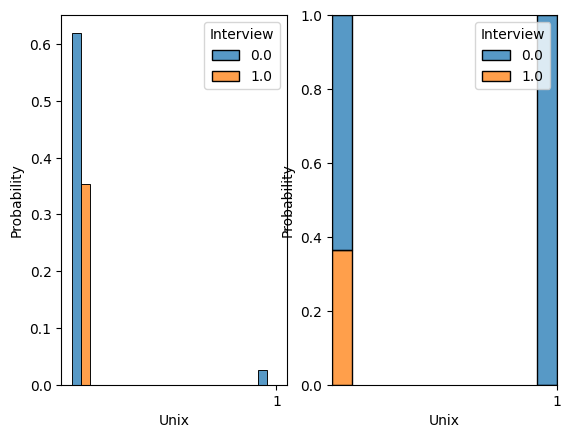

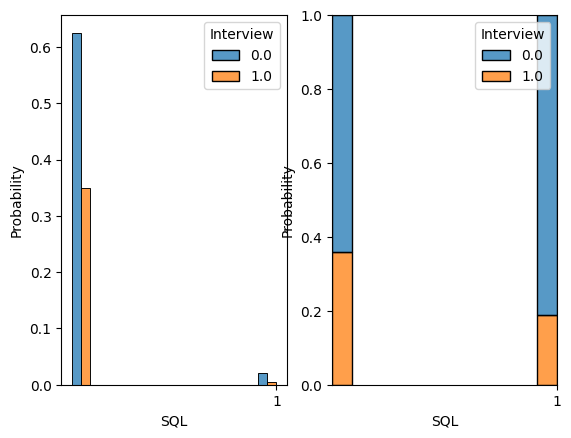

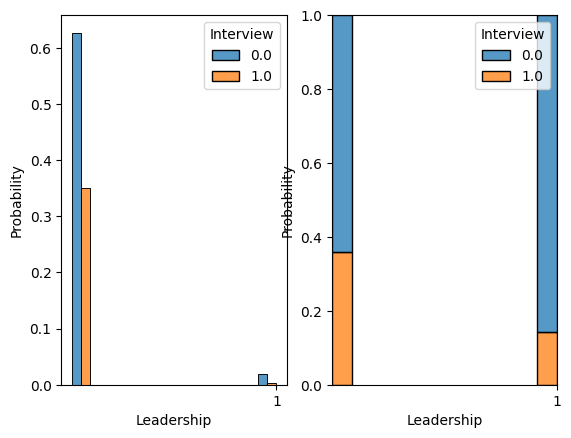

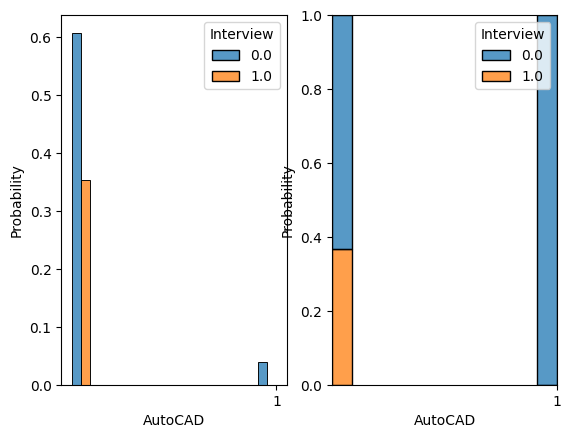

In [122]:
for col in ['Unix', 'SQL', 'Leadership', 'AutoCAD']:
  fig, ax = plt.subplots(1,2)

  ax[0].set_xticks([1, 2])
  ax[1].set_xticks([1, 2])
  
  ax1 = sns.histplot(data=df, x=col, hue="Interview", stat="probability", multiple="dodge", ax=ax[0])
  ax2 = sns.histplot(data=df, x=col, hue="Interview", stat="probability", multiple="fill", ax=ax[1])

  fig.show()

## Preprocessing

In [123]:
# Define a preprocess_inputs function that takes a dataframe and performs the following operations:
# 1. removes the ID column
# 2. Splits the data into target and dependent features.
# 3. Creates a train-test split, keeping 30% of the data for testing.
# 4. Scales the data to be normally distributed between -1 and 1.
def preprocess(df : pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    
    df = df.drop(columns=['Unnamed: 0'])
    
    X = df.drop(columns=['Interview'])
    y = df['Interview']
    
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
    
    sc = StandardScaler()
    sc.fit(X_train)
    
    X_train = pd.DataFrame(sc.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(sc.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return X_train, y_train, X_test, y_test

In [124]:
X_train, y_train, X_test, y_test = preprocess(df)

In [125]:
# Call the function on the dataframe. Print X_train.
X_train

,Adobe Illustrator,Adobe Photoshop,Agile Methodologies,Analytical Skills,Art,Art Direction,Auditing,AutoCAD,Automation,Automotive,...,Windows,Windows Server,Wireless Technologies,WordPress,Workshops,Writing,Veteran,Female,URM,Disability
538,-0.128187,5.470701,-0.353094,-0.145693,-0.108084,-0.168830,-0.137199,-0.195881,-0.182792,-0.189434,...,-0.168830,-0.182792,-0.189434,-0.168830,-0.145693,6.193839,-0.855570,-1.021006,-0.974910,-0.974910
429,-0.128187,5.470701,-0.353094,-0.145693,-0.108084,-0.168830,-0.137199,-0.195881,-0.182792,-0.189434,...,-0.168830,-0.182792,-0.189434,-0.168830,-0.145693,-0.161451,-0.855570,-1.021006,-0.974910,-0.974910
93,-0.128187,-0.182792,-0.353094,-0.145693,-0.108084,-0.168830,-0.137199,-0.195881,-0.182792,-0.189434,...,-0.168830,-0.182792,-0.189434,-0.168830,-0.145693,-0.161451,1.168811,0.979426,1.025735,1.025735
231,-0.128187,-0.182792,-0.353094,-0.145693,-0.108084,-0.168830,-0.137199,5.105144,-0.182792,-0.189434,...,5.923119,-0.182792,-0.189434,-0.168830,-0.145693,-0.161451,-0.855570,-1.021006,-0.974910,-0.974910
34,-0.128187,-0.182792,-0.353094,-0.145693,-0.108084,5.923119,-0.137199,-0.195881,-0.182792,-0.189434,...,-0.168830,-0.182792,-0.189434,5.923119,-0.145693,-0.161451,-0.855570,0.979426,1.025735,-0.974910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.128187,-0.182792,-0.353094,-0.145693,-0.108084,-0.168830,-0.137199,-0.195881,-0.182792,-0.189434,...,-0.168830,-0.182792,-0.189434,-0.168830,-0.145693,-0.161451,-0.855570,-1.021006,-0.974910,-0.974910
315,-0.128187,-0.182792,-0.353094,-0.145693,-0.108084,-0.168830,-0.137199,-0.195881,-0.182792,-0.189434,...,-0.168830,-0.182792,-0.189434,-0.168830,-0.145693,-0.161451,1.168811,0.979426,1.025735,1.025735
536,-0.128187,-0.182792,-0.353094,-0.145693,-0.108084,-0.168830,-0.137199,-0.195881,-0.182792,-0.189434,...,-0.168830,-0.182792,-0.189434,-0.168830,-0.145693,-0.161451,1.168811,-1.021006,-0.974910,1.025735
550,-0.128187,-0.182792,-0.353094,-0.145693,-0.108084,-0.168830,-0.137199,-0.195881,-0.182792,-0.189434,...,-0.168830,-0.182792,-0.189434,-0.168830,-0.145693,-0.161451,1.168811,0.979426,1.025735,1.025735


In [126]:
# Display summary statistics about X_train.
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Adobe Illustrator,433.0,-1.640976e-17,1.001157,-0.128187,-0.128187,-0.128187,-0.128187,7.801099
Adobe Photoshop,433.0,0.000000e+00,1.001157,-0.182792,-0.182792,-0.182792,-0.182792,5.470701
Agile Methodologies,433.0,-6.563905e-17,1.001157,-0.353094,-0.353094,-0.353094,-0.353094,2.832108
Analytical Skills,433.0,2.461464e-17,1.001157,-0.145693,-0.145693,-0.145693,-0.145693,6.863753
Art,433.0,5.333173e-17,1.001157,-0.108084,-0.108084,-0.108084,-0.108084,9.252027
...,...,...,...,...,...,...,...,...
Writing,433.0,-8.204881e-18,1.001157,-0.161451,-0.161451,-0.161451,-0.161451,6.193839
Veteran,433.0,1.066635e-16,1.001157,-0.855570,-0.855570,-0.855570,1.168811,1.168811
Female,433.0,-5.538295e-17,1.001157,-1.021006,-1.021006,0.979426,0.979426,0.979426
URM,433.0,-8.204881e-18,1.001157,-0.974910,-0.974910,-0.974910,1.025735,1.025735


In [127]:
# How does the distribution of the training labels look like?
y_train.value_counts()

Interview
0.0    272
1.0    161
Name: count, dtype: int64

## Model building without dimensionality reduction

In [128]:
# Create a dictionary called "models" mapping strings to models (instance of sklearn classes).
# Use the following models:
# '      Logistic Regression'
# ' Decision Tree Classifier'
# ' Random Forest Classifier'
# 'Support Vector Classifier' <- ensure that the "probability" parameter is set to True.

models = dict(
    {'LogisticRegression' :LogisticRegression(), 
    'DecisionTreeLlassifier' : DecisionTreeClassifier(), 
    'RandomForestClassifier' : RandomForestClassifier(), 
    "SVC" : SVC(probability=True)}
)

In [129]:
# Train all the models in the dictionary.
for model in models:
    models[model].fit(X_train, y_train)

In [130]:
# Print the accuracy, loss and f1 score of the models.
for model in models:
    predictions = models[model].predict(X_test)
    print(f'{model} | accuracy: {accuracy_score(predictions, y_test)} | log loss: {log_loss(predictions, y_test)} | f1: {f1_score(predictions, y_test)}')
    

LogisticRegression | accuracy: 0.956989247311828 | log loss: 1.550264661897512 | f1: 0.9310344827586207
DecisionTreeLlassifier | accuracy: 0.8602150537634409 | log loss: 5.038360151166914 | f1: 0.7636363636363637
RandomForestClassifier | accuracy: 0.8924731182795699 | log loss: 3.8756616547437797 | f1: 0.8305084745762712
SVC | accuracy: 0.9301075268817204 | log loss: 2.5191800755834572 | f1: 0.8869565217391304


## Model building with dimensionality reduction

- Using all features and just switching the perspective

In [131]:
# Use the PCA class from sklearn with n_components equal to 222 and apply it on the feature matrices.
pca = PCA(n_components=222)
pca.fit(X_train)

X_train_reduced = pd.DataFrame(pca.transform(X_train), index=X_train.index, columns=[f'PC {i}' for i in range(222)])
X_test_reduced = pd.DataFrame(pca.transform(X_test), index=X_test.index, columns=[f'PC {i}' for i in range(222)])

In [132]:
# Plot X_train_reduced.
X_train_reduced

,PC 0,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,...,PC 212,PC 213,PC 214,PC 215,PC 216,PC 217,PC 218,PC 219,PC 220,PC 221
538,2.652583,0.260387,-0.222148,-1.477943,-4.603321,-1.060093,-4.013655,2.418030,-0.509878,-1.945312,...,0.024464,-0.446819,-0.223838,0.232076,-0.252640,0.327558,-0.028299,0.133212,-0.153782,-0.041624
429,2.062618,0.087592,0.183250,-0.355908,-2.803522,-0.525048,-2.788005,-0.506446,0.030676,-2.113086,...,0.119664,0.544531,-0.054191,-0.148206,0.332179,0.146207,0.204590,0.088417,0.261736,-0.102791
93,-1.545584,0.684856,-0.482985,-0.808177,1.342684,0.729326,-0.276321,-1.576158,-0.750888,-1.676612,...,0.047727,0.529194,0.363499,0.160846,0.258670,-0.361200,-0.505482,-0.095915,-0.327084,-0.059910
231,3.332335,0.735893,1.090897,-1.454331,2.818262,1.096888,-1.313685,-0.861597,-0.644787,-0.453380,...,0.770302,0.216635,-0.311391,0.280981,0.502687,0.001753,0.502961,0.086303,0.078119,0.082548
34,0.417151,1.213844,0.736554,1.028481,1.023249,0.917755,0.104352,1.206635,1.483023,-1.854409,...,0.358270,0.098117,0.129507,0.037745,0.307969,-0.098756,-0.022157,0.112794,-0.286725,0.241212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.251196,-2.257268,0.484982,0.089839,0.238635,-0.929931,0.526227,1.239762,-0.334754,-0.755899,...,0.139042,0.257523,-0.373286,-0.144995,0.506144,0.380505,-0.351548,-0.309728,0.034957,0.155477
315,-0.385128,0.782088,0.770395,0.028734,-2.070470,1.850884,-0.311630,-2.099231,-1.447623,-0.315726,...,-0.457582,-0.167134,-0.409228,-0.266470,0.116162,-0.237419,-0.083280,-0.202984,0.036929,0.032273
536,-1.876354,-1.846119,-0.098610,-0.108718,-0.190158,-0.372504,0.081521,0.116728,-0.717346,0.450936,...,-0.215016,-0.058932,-0.462818,0.044837,-0.425472,-0.253043,-0.197582,0.018149,-0.213251,-0.170754
550,-0.387102,2.871511,-2.179307,-0.338470,-1.040605,-1.377157,-1.727515,0.674573,0.633221,0.202641,...,-0.492194,0.362803,-0.243123,0.148989,0.381584,-0.342603,-0.183899,-0.325801,0.148938,0.046824


Notice how most of the variance is contained in the first few principle components.

In [133]:
# Display the "explained_variance_" values of the fitted PCA object.
# Notice that they are sorted. The first feature explains most of the variance in the data.
pca.explained_variance_

array([4.62852543, 3.11633205, 2.90956188, 2.83947677, 2.78296022,
       2.74694692, 2.70101145, 2.65770932, 2.58288529, 2.55949955,
       2.54187688, 2.49048127, 2.44754051, 2.40871968, 2.40688157,
       2.3490628 , 2.31783813, 2.26831439, 2.26592696, 2.22718989,
       2.2132362 , 2.16473031, 2.15939441, 2.13247769, 2.11383002,
       2.081375  , 2.05951026, 2.04830299, 2.00715598, 1.98389432,
       1.97172099, 1.92980345, 1.90734721, 1.88243718, 1.87099763,
       1.84558904, 1.83298884, 1.81844371, 1.7826347 , 1.76959307,
       1.75432168, 1.73037343, 1.72176664, 1.7072297 , 1.68451247,
       1.66791795, 1.65079081, 1.64008784, 1.62841707, 1.59685783,
       1.58295141, 1.57799915, 1.55690866, 1.55114232, 1.52226783,
       1.49529487, 1.4843256 , 1.47383739, 1.45807356, 1.43857005,
       1.41682783, 1.4049743 , 1.38103717, 1.37551006, 1.34940806,
       1.33701788, 1.33224254, 1.32141268, 1.31062621, 1.28835214,
       1.27690542, 1.26098358, 1.25057769, 1.22968992, 1.20823

In [134]:
# Display the "explained_variance_ratio_" of the fitted PCA object.
pca.explained_variance_ratio_

array([0.02080106, 0.01400511, 0.01307587, 0.0127609 , 0.01250691,
       0.01234506, 0.01213862, 0.01194402, 0.01160775, 0.01150265,
       0.01142345, 0.01119248, 0.0109995 , 0.01082503, 0.01081677,
       0.01055693, 0.0104166 , 0.01019404, 0.01018331, 0.01000922,
       0.00994651, 0.00972852, 0.00970454, 0.00958357, 0.00949977,
       0.00935391, 0.00925565, 0.00920528, 0.00902036, 0.00891582,
       0.00886111, 0.00867273, 0.00857181, 0.00845986, 0.00840845,
       0.00829426, 0.00823764, 0.00817227, 0.00801134, 0.00795273,
       0.0078841 , 0.00777647, 0.00773779, 0.00767246, 0.00757037,
       0.00749579, 0.00741882, 0.00737072, 0.00731827, 0.00717644,
       0.00711394, 0.00709169, 0.00699691, 0.00697099, 0.00684123,
       0.00672001, 0.00667071, 0.00662357, 0.00655273, 0.00646508,
       0.00636737, 0.0063141 , 0.00620652, 0.00618168, 0.00606438,
       0.00600869, 0.00598723, 0.00593856, 0.00589009, 0.00578999,
       0.00573854, 0.00566699, 0.00562022, 0.00552635, 0.00542

In [135]:
sum(pca.explained_variance_ratio_[:111])
# Interesting to see that 50% of the eigenvectors is representing 80% of the variance.

0.8088975823016824

In [136]:
# Recreate and retrain the models on the PCA transformed data. Measure their performance and loss.
# Are the models better?

models = dict(
    {
        'LogisticRegression' : LogisticRegression(),
        'DecisionTreeClassifier' : DecisionTreeClassifier(), 
        'RandomForestClassifier' : RandomForestClassifier(), 
        'SVC' : SVC(probability=True)
    }
)

for model in models:
    models[model].fit(X_train_reduced, y_train)
    
for model in models:
    predictions = models[model].predict(X_test_reduced)
    
    accuracy = accuracy_score(predictions, y_test)
    loss = log_loss(predictions, y_test)
    f1 = f1_score(predictions, y_test)
    
    print(f'{model} | accuracy : {accuracy} | loss : {loss} | f1_score : {f1}')

LogisticRegression | accuracy : 0.956989247311828 | loss : 1.550264661897512 | f1_score : 0.9310344827586207
DecisionTreeClassifier | accuracy : 0.8602150537634409 | loss : 5.038360151166914 | f1_score : 0.7903225806451613
RandomForestClassifier | accuracy : 0.9408602150537635 | loss : 2.131613910109079 | f1_score : 0.9026548672566371
SVC | accuracy : 0.9301075268817204 | loss : 2.5191800755834572 | f1_score : 0.8869565217391304


The idea now is to drop all columns with little variance and hold on to the first few, as they hold the most amount of information.

In [137]:
# Now use PCA to leave only 2 features (n_components equal to 2).
# Recreate and retrain the models on the PCA transformed data with only 2 features. Measure their performance and loss.
# Are the models better?
pca = PCA(n_components=2)
pca.fit(X_train)

X_train_reduced = pd.DataFrame(pca.transform(X_train), index=X_train.index, columns=[f'PC {i}' for i in range(2)])
X_test_reduced = pd.DataFrame(pca.transform(X_test), index=X_test.index, columns=[f'PC {i}' for i in range(2)])

models = dict(
    {
        'LogisticRegression' : LogisticRegression(),
        'DecisionTreeClassifier' : DecisionTreeClassifier(), 
        'RandomForestClassifier' : RandomForestClassifier(), 
        'SVC' : SVC(probability=True)
    }
)

for model in models:
    models[model].fit(X_train_reduced, y_train)
    
for model in models:
    predictions = models[model].predict(X_test_reduced)
    
    accuracy = accuracy_score(predictions, y_test)
    loss = log_loss(predictions, y_test)
    f1 = f1_score(predictions, y_test)
    
    print(f'{model} | accuracy : {accuracy} | loss : {loss} | f1_score : {f1}')


LogisticRegression | accuracy : 0.956989247311828 | loss : 1.550264661897512 | f1_score : 0.9285714285714286
DecisionTreeClassifier | accuracy : 0.946236559139785 | loss : 1.9378308273718898 | f1_score : 0.9122807017543859
RandomForestClassifier | accuracy : 0.9623655913978495 | loss : 1.356481579160323 | f1_score : 0.9380530973451328
SVC | accuracy : 0.956989247311828 | loss : 1.550264661897512 | f1_score : 0.9285714285714286


We can say that the performance of all models has increased. Especially the Decision tree classifier!

<Axes: xlabel='PC 0', ylabel='PC 1'>

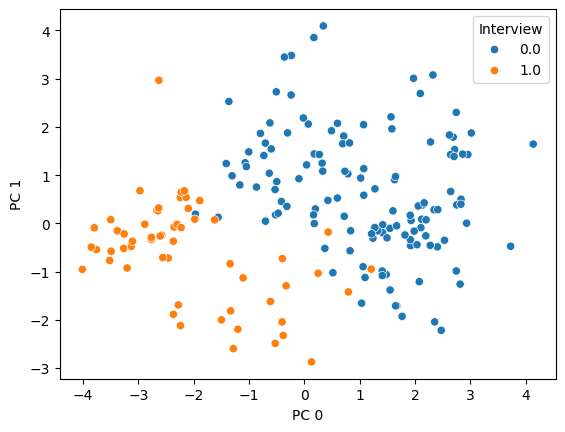

In [138]:
# Plot the PCA features against the truth label for the test data.
sns.scatterplot(x=X_test_reduced['PC 0'], y=X_test_reduced['PC 1'], hue=y_test)
